# Phân cụm K-Means

Chúng ta sẽ bắt đầu với K-Means, đây thực sự là mô hình phân cụm phổ biến nhất.

Và mục đích của nhiệm vụ này là gì?

Nhóm chiến lược hoặc nhóm phân tích này muốn làm gì?

Như bạn có thể đoán, chúng ta đang thực hiện phân cụm, nhóm này muốn hiểu khách hàng của mình một cách đơn giản. Họ muốn xác định một số mẫu trong khách hàng, trong cơ sở khách hàng của mình. Và đó là điều quan trọng cần hiểu ở đây. Ngược với hồi quy và phân loại trước đó: chúng ta thực sự biết những gì cần dự đoán thì lần này khi thực hiện phân cụm, chúng ta không thực sự biết phải dự đoán điều gì. Dù vậy, chúng ta vẫn biết rằng chúng ta muốn xác định một số mẫu. Và đó là cách thức, mục đích của nhiệm vụ này.

## Import các thư viện

Chúng ta sẽ bắt đầu bằng cách import các thư viện.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import tập dữ liệu

Giờ chúng ta sẽ import tập dữ liệu. 

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Sử dụng phương thức elbow để tìm số cụm tối ưu

Chúng ta sẽ chạy thuật toán K-Means nhiều lần, mỗi lần với một số cụm khác nhau. Và mỗi lần chạy thuật toán với số lượng cụm khác nhau này, chúng ta sẽ tính tổng bình phương khoảng cách giữa mỗi điểm quan sát của cụm và tâm của cụm.

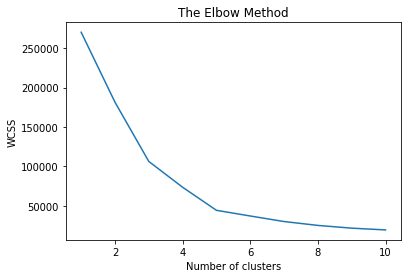

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Sau khi chạy đoạn code trên, **số lượng cụm tối ưu mà chúng ta phải sử dụng ở đây là bao nhiêu**?

Hãy nhớ rằng đây là số lượng các cụm mà từ đó giá trị WWCSS bắt đầu chậm lại, bắt đầu giảm phần độ dốc. Dựa vào đây, tôi đề xuất số 5, vì từ số này đường cong bắt đầu gần như là bằng phẳng và giảm rất chậm ở đây.

## Huấn luyện mô hình K-Means trên tập dữ liệu

Huấn luyện mô hình K-Means với số tâm cụm tối ưu k = 5

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Hiển thị các cụm

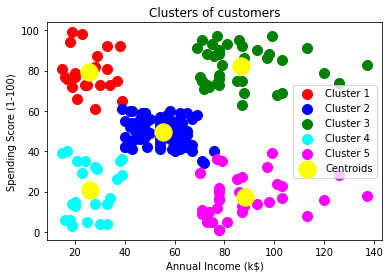

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Việc hiển thị các cụm giúp chúng ta có thể thấy rõ ràng có 5 cụm khách hàng. Bây giờ hãy phân tích để hiểu chúng là gì, bởi vì mục tiêu của việc này, mục tiêu của MA khi thực hiện phân cụm ở đây là để hiểu rõ hơn về khách hàng của họ, truy xuất một số thông tin chi tiết từ khách hàng để thúc đẩy việc kinh doanh bằng cách đưa ra một số ưu đãi liên quan cho các cụm khách hàng khác nhau trong nhóm này.

Cụm **màu lục lam** tương ứng với cụm số **bốn**. Và nó biểu thị điều gì? Về cơ bản, cụm này chứa tất cả các khách hàng có thu nhập hàng năm thấp và những người tiêu rất ít vào trung tâm mua sắm.

Cụm số **năm** chứa tất cả các khách hàng có thu nhập hàng năm cao nhưng vẫn không chi tiêu nhiều.

Cụm số **một** là nhóm khách hàng có thu nhập hàng năm thấp và có điểm chi tiêu cao.

Cụm số **ba** chứa tất cả các khách hàng có thu nhập hàng năm cao và tiêu nhiều trong trung tâm mua sắm.

Và cuối cùng có cụm số **hai** giống một cụm trung bình và chứa các khách hàng có thu nhập hàng năm ở mức trung bình và chi tiêu bình thường trong trung tâm mua sắm.